# Devstutya Pandey

## **To what extent are the gun violence incidents classified as homicides affected by demographic factors ?**

### Sub questions:
1. What relation do gun violence incidents that are classified as homicides (we can see this in the 'intent' column) have with demographic factors (specifically age, race and sex)? This sub-question will have 3 parts and will be explored while keeping other factors such as education and location constant. The three parts will be:
    - What relation do gun violence incidents that are classified as homicides (we can see this in the 'intent' column) have with the age of the perpetrator?
    - What relation do gun violence incidents that are classified as homicides have with the race of the perpetrator?
    - What relation do gun violence incidents that are classified as homicides have with the sex of the perpetrator?
    


2. How is the relation between homicides and demographics affected by differing education? For this sub question, we will be using the 'education column' to look into how the initially explored relation between homicides and demographics can vary with the education of the perpetrator. Will a less educated individual be more likely to be involved in a homicide? 




## Exploratory Data Analysis

#### Firstly, we have a look at the raw data given to us and better understand the variables 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks",font_scale=1.3, )

In [8]:
data = pd.read_csv("../data/raw/full_data.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED
...,...,...,...,...,...,...,...,...,...,...
100793,2014,12,Homicide,0,M,36.0,Black,100,Home,HS/GED
100794,2014,12,Homicide,0,M,19.0,Black,100,Street,HS/GED
100795,2014,12,Homicide,0,M,20.0,Black,100,Street,HS/GED
100796,2014,12,Homicide,0,M,22.0,Hispanic,260,Street,Less than HS


In [22]:
print(data.nunique(axis = 0))
data.describe()
#To better understand our dataset and its variables

year           3
month         12
intent         4
police         2
sex            2
age          104
race           5
hispanic      39
place         10
education      4
dtype: int64


,year,month,police,age,hispanic
count,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000
mean,2013.000357,6.567601,0.013909,43.857601,114.179607
std,0.816278,3.405609,0.117114,19.496181,61.595734
min,2012.000000,1.000000,0.000000,0.000000,100.000000
25%,2012.000000,4.000000,0.000000,27.000000,100.000000
50%,2013.000000,7.000000,0.000000,42.000000,100.000000
75%,2014.000000,9.000000,0.000000,58.000000,100.000000
max,2014.000000,12.000000,1.000000,107.000000,998.000000


### Next, we will clean up the dataset and display the data which will be most relevant to the research question

Specifically we're going to remove the irrelavant data, like the 'hispanic', 'police', and the 'place' column. Additionally as we're only looking at the gun violence incidents that classify as homicides, we will be modifying the dataset accordingly.

In [18]:
mod_data = raw_data.drop(columns= ['hispanic', 'place', 'police' ])
mod_data = mod_data[mod_data.intent == "Homicide"]
mod_data.reset_index(inplace = True)
mod_data

,index,year,month,intent,sex,age,race,education
0,14,2012,3,Homicide,M,27.0,White,HS/GED
1,18,2012,3,Homicide,M,31.0,Asian/Pacific Islander,Some college
2,22,2012,4,Homicide,F,47.0,Black,HS/GED
3,24,2012,4,Homicide,M,51.0,White,HS/GED
4,25,2012,4,Homicide,M,41.0,White,HS/GED
...,...,...,...,...,...,...,...,...
35171,100793,2014,12,Homicide,M,36.0,Black,HS/GED
35172,100794,2014,12,Homicide,M,19.0,Black,HS/GED
35173,100795,2014,12,Homicide,M,20.0,Black,HS/GED
35174,100796,2014,12,Homicide,M,22.0,Hispanic,Less than HS


Since the research question I am focusing on has 2 major sub-questions, the first sub-question will not require the 'education' column, whereas the second sub-question will (so mod_data will be used for the second sub-question, ideally to create a facet plot for analysis). 
I will be using the following dataset (below) to explore the first sub-question of my research question.

mod1_data = raw_data.drop(columns= ['hispanic', 'place', 'police', 'education' ])
mod1_data = mod1_data[mod1_data.intent == "Homicide"]
mod1_data.reset_index(inplace = True)
mod1_data

### Analysis using modified dataframes

##### First sub-question:

- What relation do gun violence incidents that are classified as homicides (we can see this in the 'intent' column) have with demographic factors (specifically age, race and sex)? This sub-question will have 3 parts and will be explored while keeping other factors such as education and location constant. The three parts will be:

     - What relation do gun violence incidents that are classified as homicides (we can see this in the 'intent' column) have with the age of the perpetrator?
    - What relation do gun violence incidents that are classified as homicides have with the race of the perpetrator?
    - What relation do gun violence incidents that are classified as homicides have with the sex of the perpetrator?

Here we can see, that this sub-question is divided into 3 specific parts, and for each sub part I will be analysing a different demographic

1. The below visualisation will help us analyse the following question: 
- What relation do gun violence incidents that are classified as homicides (we can see this in the 'intent' column) have with the age of the perpetrator?

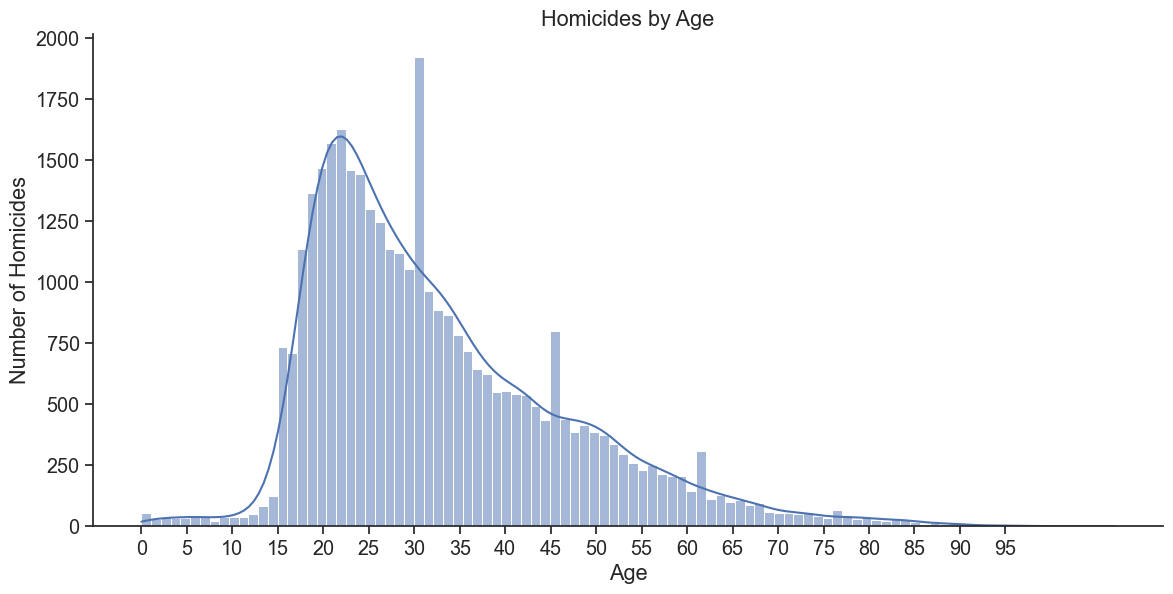

In [59]:
sns.displot(mod1_data, x = 'age', bins=100, height = 6, aspect = 2, kde = True)
plt.title('Homicides by Age')
plt.xlabel('Age')
plt.ylabel('Number of Homicides')
plt.xticks(np.arange(0, 100, 5))
plt.show()


We can see a distinct pattern from the above plot, the highest number of homicides are being perpetrated by those between the ages of 20 and 40. The highest point being at the age of 31. The density curve also shows a peak of homicide incidents around the age of 20, and after this peak there is a gradual decrease as people get older. There are also a couple of anomalies which go beyond the density line, for example, there is a spike of homicide incidents that happen in the age of 45-46.


2. The below visualisation will help us analyse the next question: 
   - What relation do gun violence incidents that are classified as homicides have with the race of the perpetrator?

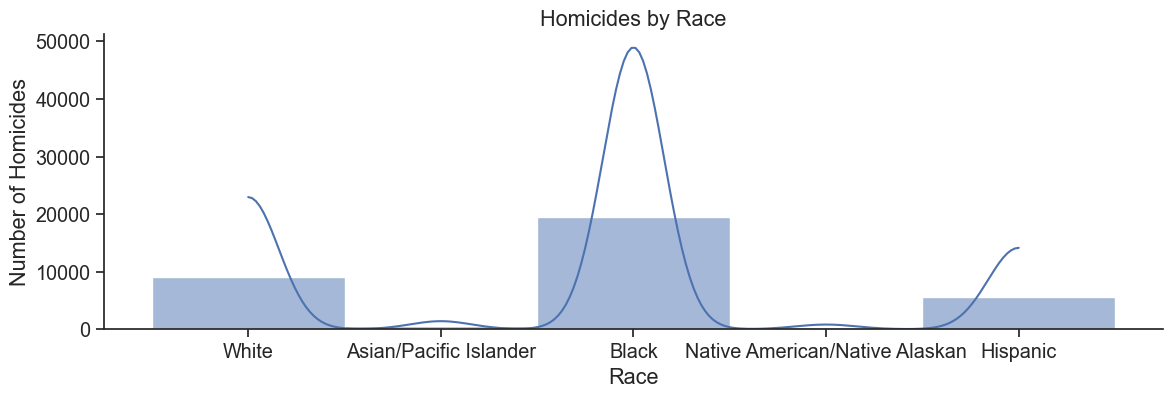

In [92]:
sns.displot(mod1_data, x = 'race', binwidth= 10, height = 4, aspect = 3, kde = True)
plt.title('Homicides by Race')
plt.xlabel('Race')
plt.ylabel('Number of Homicides')
plt.show()

From the above graph we can see that the highest number of homicides are perpetrated by the Black race, and 'White' is following up in second. That is the only trend we can see from the above graph, for a more comprehensive analysis we will create more visualisations, using a joint plot to see how race and sex/age affect the number of homicides.


3. The below visualisation will help us analyse the next question: 
   - What relation do gun violence incidents that are classified as homicides have with the sex of the perpetrator?

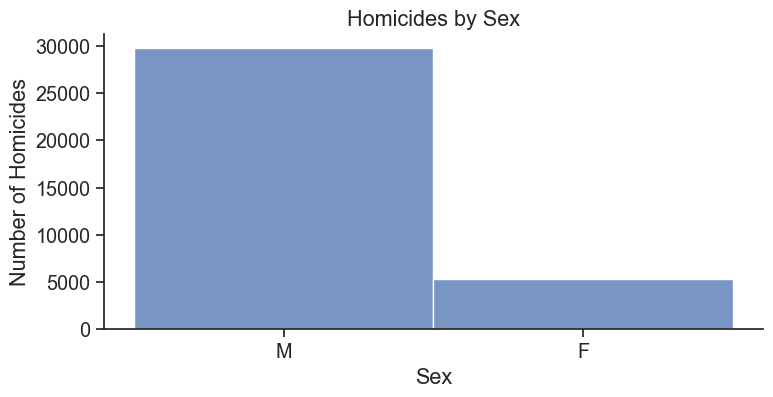

In [76]:
sns.displot(mod1_data, x = 'sex', height = 4, aspect = 2)
plt.title('Homicides by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Homicides')
plt.show()

From the above graph, we can see that gun violence incidents classified as homicides occur significantly more when a male is involved, when compared to a female. This relationship will explored more when we analyze how all three demographic variables (age,sex, and race) affect the number of homicides simulataneously.

Further exploration of the first sub-question will be done in the second sub question, and it will involve more advanced visualisations which will help us analyse all three demographic variables (age,sex, and race) simulataneously.

#### Further Exlporation

##### Second sub-question:

- How is the relation between homicides and demographics affected by differing education? For this sub question, we will be using the 'education column' to look into how the initially explored relation between homicides and demographics can vary with the education of the perpetrator. Will a less educated individual be more likely to be involved in a homicide?

For this sub-question, we will be using mod_data as the main dataframe.

In [79]:
mod_data

,level_0,index,year,month,intent,sex,age,race,education
0,0,14,2012,3,Homicide,M,27.0,White,HS/GED
1,1,18,2012,3,Homicide,M,31.0,Asian/Pacific Islander,Some college
2,2,22,2012,4,Homicide,F,47.0,Black,HS/GED
3,3,24,2012,4,Homicide,M,51.0,White,HS/GED
4,4,25,2012,4,Homicide,M,41.0,White,HS/GED
...,...,...,...,...,...,...,...,...,...
35171,35171,100793,2014,12,Homicide,M,36.0,Black,HS/GED
35172,35172,100794,2014,12,Homicide,M,19.0,Black,HS/GED
35173,35173,100795,2014,12,Homicide,M,20.0,Black,HS/GED
35174,35174,100796,2014,12,Homicide,M,22.0,Hispanic,Less than HS


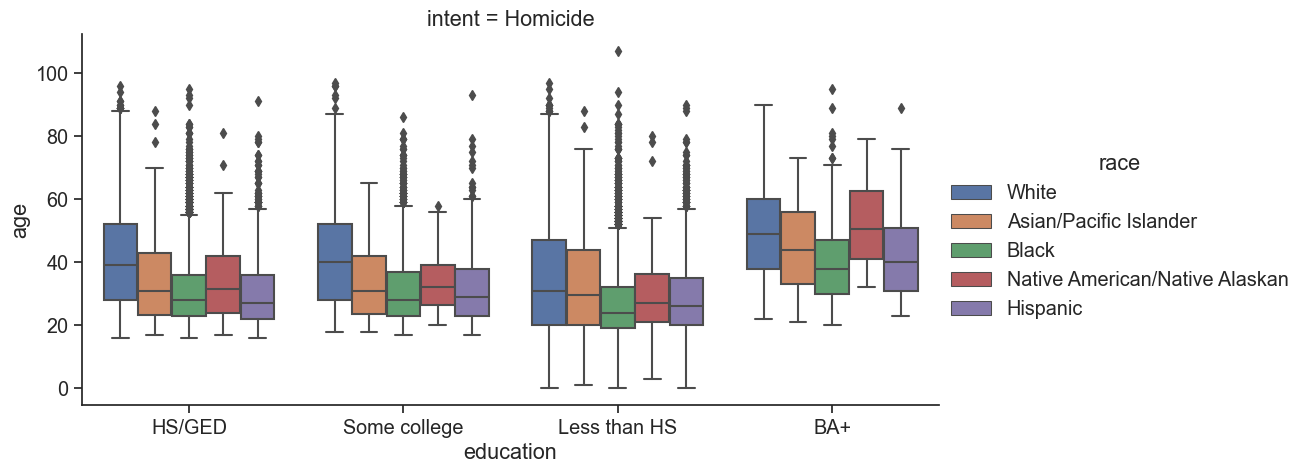

In [88]:
sns.catplot(data=mod_data, x='education', y='age',hue='race',col='intent',kind='box', aspect= 2)

From this graph we can see even though, overall the black race had the highest number of homicides, when education is brought into the frame the numbers change drastically. When a person has education of HS/GED or college education, white people are generally more involved in homicides. However there are many outliers in this graph, especially for the Black race in the education category 'Less than HS'. This shows that on average or in general the black race will not be ass involved as the others but the amount of outliers are significantly more. 

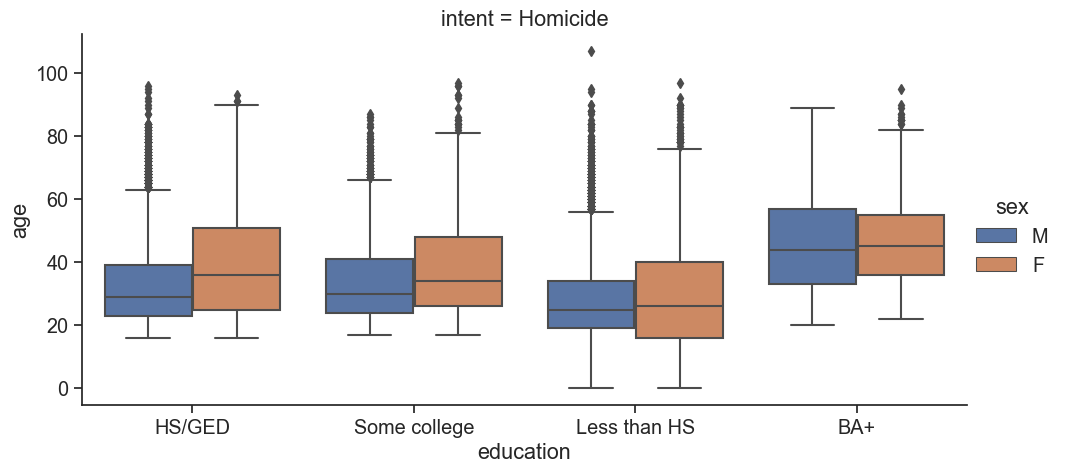

In [91]:
sns.catplot(data=mod_data, x='education', y='age',hue='sex',col='intent',kind='box', aspect= 2)

Through this second graph we can see that when education is put into consideration, the female sex can in general be involved more in homicides if they are in the education categories -"HS/GED", "Less than HS" or "Some College". However, similar to the previous graph, the amount of outliers the male sex has in all categories except BA+ is significantly more than the female sex. This will contirbute to a more interesting analysis.